In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
os.chdir (r'C:\Users\samart\Documents\clg internship')

In [3]:
ds = pd.read_csv("car.csv")
ds.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data=ds.drop(["Year"],axis=1)
data=data.drop(["Owner"],axis=1)
data=data.drop(["Car_Name"],axis=1)
x=data.drop(["Selling_Price"],axis=1)
y=data.pop('Selling_Price')

In [5]:
x.rename(columns={'Present_Price':'Cost'}, inplace = True)

In [6]:
y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [7]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3,random_state=10)
xtest



,Cost,Kms_Driven,Fuel_Type,Seller_Type,Transmission
258,13.60,25000,Petrol,Dealer,Manual
154,0.88,8000,Petrol,Individual,Manual
227,4.43,57000,Petrol,Dealer,Manual
126,0.95,1300,Petrol,Individual,Manual
268,5.80,19000,Petrol,Dealer,Manual
...,...,...,...,...,...
69,20.91,12000,Petrol,Dealer,Manual
21,5.71,2400,Petrol,Dealer,Manual
208,8.10,3435,Petrol,Dealer,Manual
78,22.83,80000,Petrol,Dealer,Automatic


In [8]:
xtrain=pd.get_dummies(xtrain,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True)

In [9]:
xtest=pd.get_dummies(xtest,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True)

In [10]:
missing_cols = set (xtrain.columns) - set (xtest.columns)
for col in missing_cols:
    xtest[col] = 0
xtest = xtest[xtrain.columns]

In [11]:
ss=StandardScaler()
ss.fit(xtrain)
xtrain=ss.transform(xtrain)
xtest=ss.transform(xtest)

In [12]:
rf=RandomForestRegressor(n_estimators =100)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
r2_score(ytest,pred)

0.8882821462523204

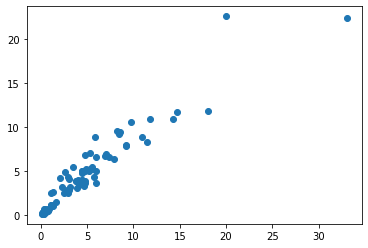

In [13]:
plt.scatter(ytest,pred)


In [14]:
pred


array([ 9.2395    ,  0.6816    ,  2.576     ,  0.7338    ,  5.041     ,
        6.829     , 22.5765    ,  0.245     ,  0.5551    ,  3.9305    ,
        0.6908    ,  9.582     ,  3.904     ,  0.5477    ,  3.68      ,
        5.4339    ,  4.0555    ,  0.1885    ,  2.569     ,  5.0382    ,
        0.7469    ,  3.4925    ,  6.6236    , 22.3825    ,  0.291     ,
        0.46736667,  0.2928    ,  0.4       ,  0.6205    ,  0.1716    ,
        2.586     , 11.8782    ,  5.25      , 10.6346    ,  0.5831    ,
        6.593     ,  2.888     ,  3.8765    ,  1.0521    ,  4.0115    ,
        4.3176    ,  0.433     ,  5.238     ,  0.34291667, 11.744     ,
        4.116     ,  0.194     ,  4.0035    ,  7.0155    ,  2.6151    ,
        0.4562    ,  8.839     ,  0.4913    , 10.8905    ,  3.2845    ,
        2.9175    ,  8.9176    ,  1.147     ,  8.0121    ,  8.3586    ,
        4.22      ,  0.2379    ,  1.4965    ,  7.0646    ,  3.663     ,
        4.3095    ,  4.9015    ,  0.27496667,  3.2385    ,  5.02